In [17]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [18]:
import pandas as pd
from tqdm.auto import tqdm

from extract_metrics_py150k import (
    read_py150k_ast,
    read_py150k_code,
    ast_str2tree,
    extract_metric_from_ast,
    create_df,
)
from config import PY150K_TRAIN_AST, PY150K_TRAIN_CODE

In [23]:
ast_str_list = read_py150k_ast(PY150K_TRAIN_AST)
data_metrics = []
for ast_str in tqdm(ast_str_list):
    ast_tree = ast_str2tree(ast_str)
    data_metric = extract_metric_from_ast(ast_tree)
    data_metrics.append(data_metric)

# sample code for loading Py150k code
code_filenames = read_py150k_code(PY150K_TRAIN_CODE)

# sample code for extracting metrics from Py150K script
train_data_df = create_df(code_filenames)

0it [00:00, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

In [24]:
def get_user_repo_feat(data_df):
    return data_df.apply(
        lambda row: f"{row['user_name']}/{row['repo_name']}", axis=1
    ).tolist()


def get_watch_count_feat(data_df):
    watch_count = (
        pd.read_csv("data/watch_count_public_data.csv")
        .rename(columns={"repo_name": "user/repo"})
        .drop(columns="Record Count")
    )
    return data_df.join(watch_count.set_index("user/repo"), on="user/repo")[
        "watch_count"
    ].tolist()

In [25]:
len(data_metrics)

100000

In [26]:
train_data_df["data_metric"] = data_metrics
train_data_df["user/repo"] = get_user_repo_feat(train_data_df)
train_data_df["watch_count"] = get_watch_count_feat(train_data_df)

In [27]:
train_plot_df = train_data_df.dropna(subset=["watch_count"])
plot_data_metrics = train_plot_df["data_metric"].tolist()
# watch_counts = train_plot_df["watch_count"].tolist()

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

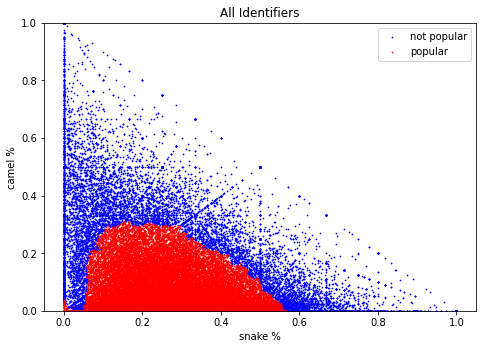

In [29]:
id_type = "total"

result = map(
    lambda _dict: [
        _dict["id"][id_type]["snake"],
        _dict["id"][id_type]["lower_camel"] + _dict["id"][id_type]["upper_camel"],
    ],
    plot_data_metrics,
)
X = np.array(list(result))

clf = IsolationForest(random_state=0).fit(X)
predictions = clf.predict(X)
# clf = LocalOutlierFactor(n_neighbors=10)
# predictions = clf.fit_predict(X)

outlier_bool = predictions == -1
inlier_bool = predictions == 1

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_ylim([0, 1])

ax.scatter(
    X[outlier_bool, 0], X[outlier_bool, 1], 0.5, color="blue", label="not popular"
)
ax.scatter(X[inlier_bool, 0], X[inlier_bool, 1], 0.5, color="red", label="popular")
ax.legend()
ax.set_title(f"All Identifiers")
ax.set_xlabel("snake %")
ax.set_ylabel("camel %")

plt.show()

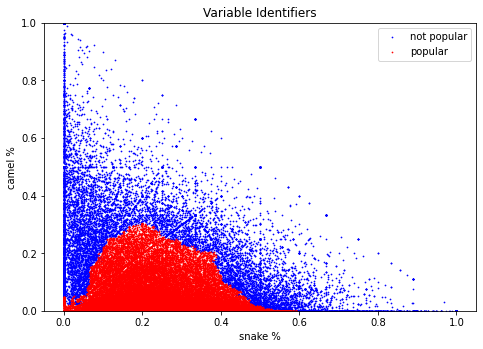

In [30]:
id_type = "var"
result = map(
    lambda _dict: [
        _dict["id"][id_type]["snake"],
        _dict["id"][id_type]["lower_camel"] + _dict["id"][id_type]["upper_camel"],
    ],
    plot_data_metrics,
)
X = np.array(list(result))

clf = IsolationForest(random_state=0).fit(X)
predictions = clf.predict(X)
# clf = LocalOutlierFactor(n_neighbors=10)
# predictions = clf.fit_predict(X)

outlier_bool = predictions == -1
inlier_bool = predictions == 1

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_ylim([0, 1])

ax.scatter(
    X[outlier_bool, 0], X[outlier_bool, 1], 0.5, color="blue", label="not popular"
)
ax.scatter(X[inlier_bool, 0], X[inlier_bool, 1], 0.5, color="red", label="popular")
ax.legend()
ax.set_title(f"Variable Identifiers")
ax.set_xlabel("snake %")
ax.set_ylabel("camel %")

plt.show()
fig.savefig(f"{id_type}_id.jpg", dpi=300, bbox_inches="tight")

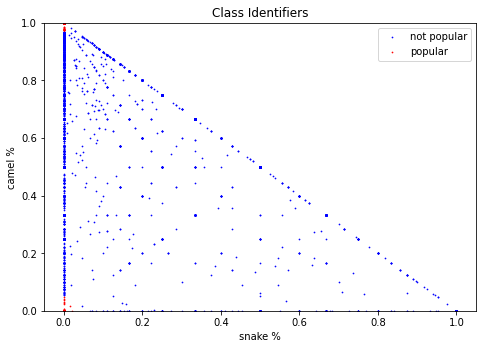

In [31]:
id_type = "class"
result = map(
    lambda _dict: [
        _dict["id"][id_type]["snake"],
        _dict["id"][id_type]["lower_camel"] + _dict["id"][id_type]["upper_camel"],
    ],
    plot_data_metrics,
)
X = np.array(list(result))

clf = IsolationForest(random_state=0).fit(X)
predictions = clf.predict(X)
# clf = LocalOutlierFactor(n_neighbors=10)
# predictions = clf.fit_predict(X)

outlier_bool = predictions == -1
inlier_bool = predictions == 1

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_ylim([0, 1])

ax.scatter(
    X[outlier_bool, 0], X[outlier_bool, 1], 0.5, color="blue", label="not popular"
)
ax.scatter(X[inlier_bool, 0], X[inlier_bool, 1], 0.5, color="red", label="popular")
ax.legend()
ax.set_title(f"Class Identifiers")
ax.set_xlabel("snake %")
ax.set_ylabel("camel %")

plt.show()
fig.savefig(f"{id_type}_id.jpg", dpi=300, bbox_inches="tight")

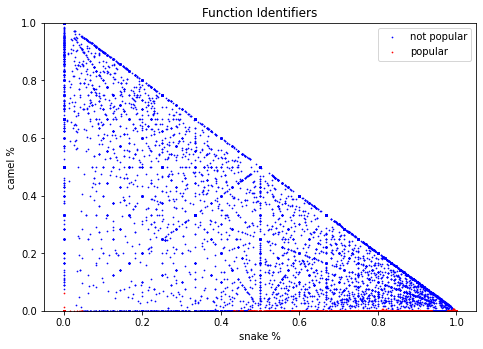

In [32]:
id_type = "func"
result = map(
    lambda _dict: [
        _dict["id"][id_type]["snake"],
        _dict["id"][id_type]["lower_camel"] + _dict["id"][id_type]["upper_camel"],
    ],
    plot_data_metrics,
)
X = np.array(list(result))

clf = IsolationForest(random_state=0).fit(X)
predictions = clf.predict(X)
# clf = LocalOutlierFactor(n_neighbors=10)
# predictions = clf.fit_predict(X)

outlier_bool = predictions == -1
inlier_bool = predictions == 1

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_ylim([0, 1])

ax.scatter(
    X[outlier_bool, 0], X[outlier_bool, 1], 0.5, color="blue", label="not popular"
)
ax.scatter(X[inlier_bool, 0], X[inlier_bool, 1], 0.5, color="red", label="popular")
ax.legend()
ax.set_title(f"Function Identifiers")
ax.set_xlabel("snake %")
ax.set_ylabel("camel %")

plt.show()
fig.savefig(f"{id_type}_id.jpg", dpi=300, bbox_inches="tight")